In [ ]:
import logging
logging.getLogger().setLevel(logging.INFO)

In [ ]:
!pip install levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Baselines - Antiphones

## Word Segmentation

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:root:Number of chants: 13865


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:The SVC model was trained with 9706 training data and 9706 testing data.
INFO:root:From model approach - Selected features: 1000 (only 100 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 5493 , Last feature occurences: 204
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sk

------------------------------- Train Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 98.86%
			 f1: 98.85%

		 NB accuracy and f1
			 accuracy: 98.06%
			 f1: 98.06%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 18889 unique segments

		 Average Segment Length
			 avgerage: 3.76 tones in one segment

		 Melody Justified With Words
			 words justification: 100.00% of segments
			 segments justification: 100.00% of segments
			 average justification: 100.00% of segments

		 Weighted Top Mode Frequency
			 wtmf: 61.96% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.24 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 6.12 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


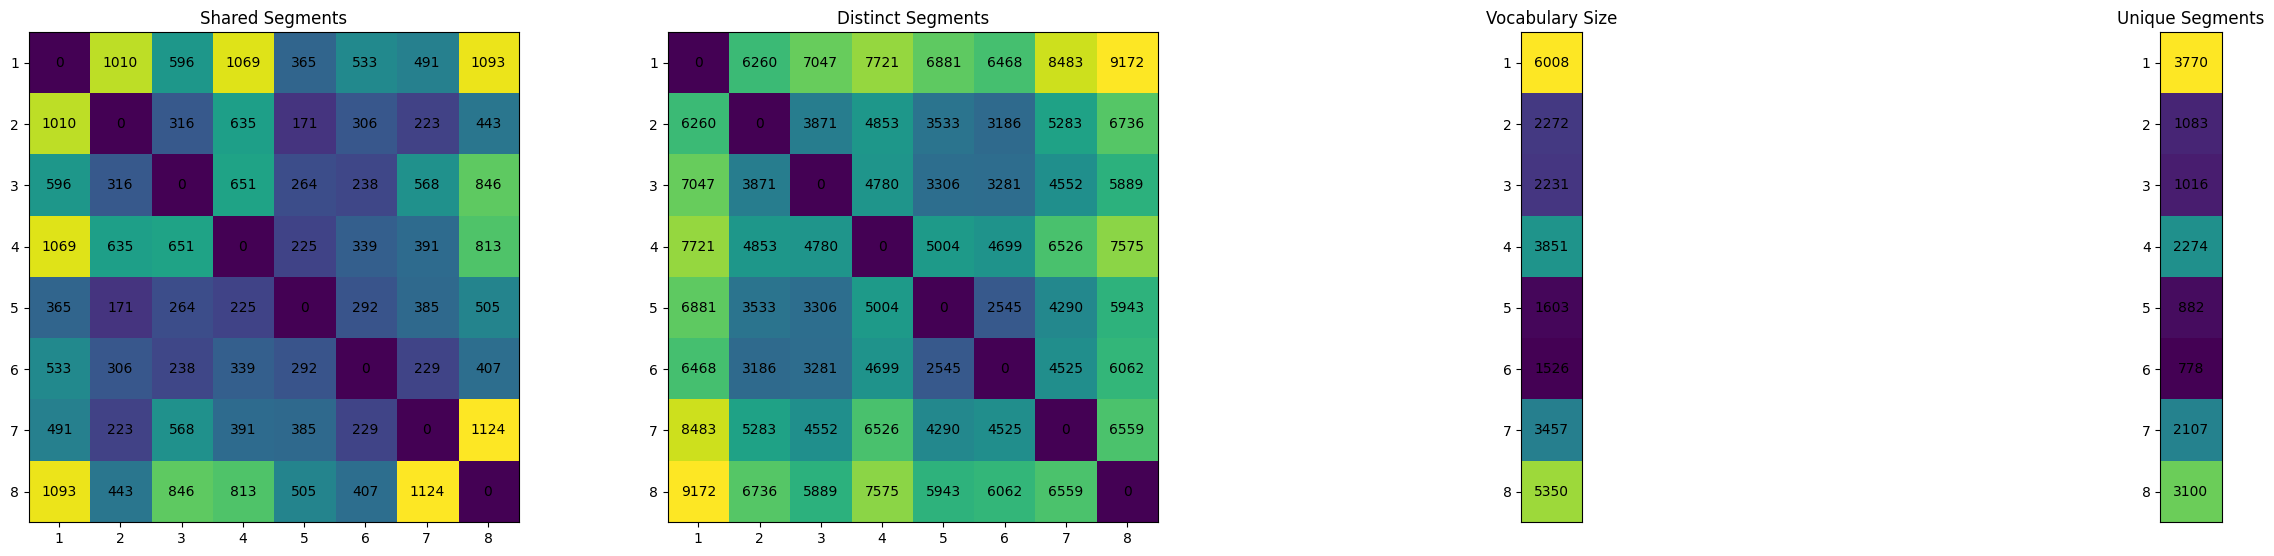

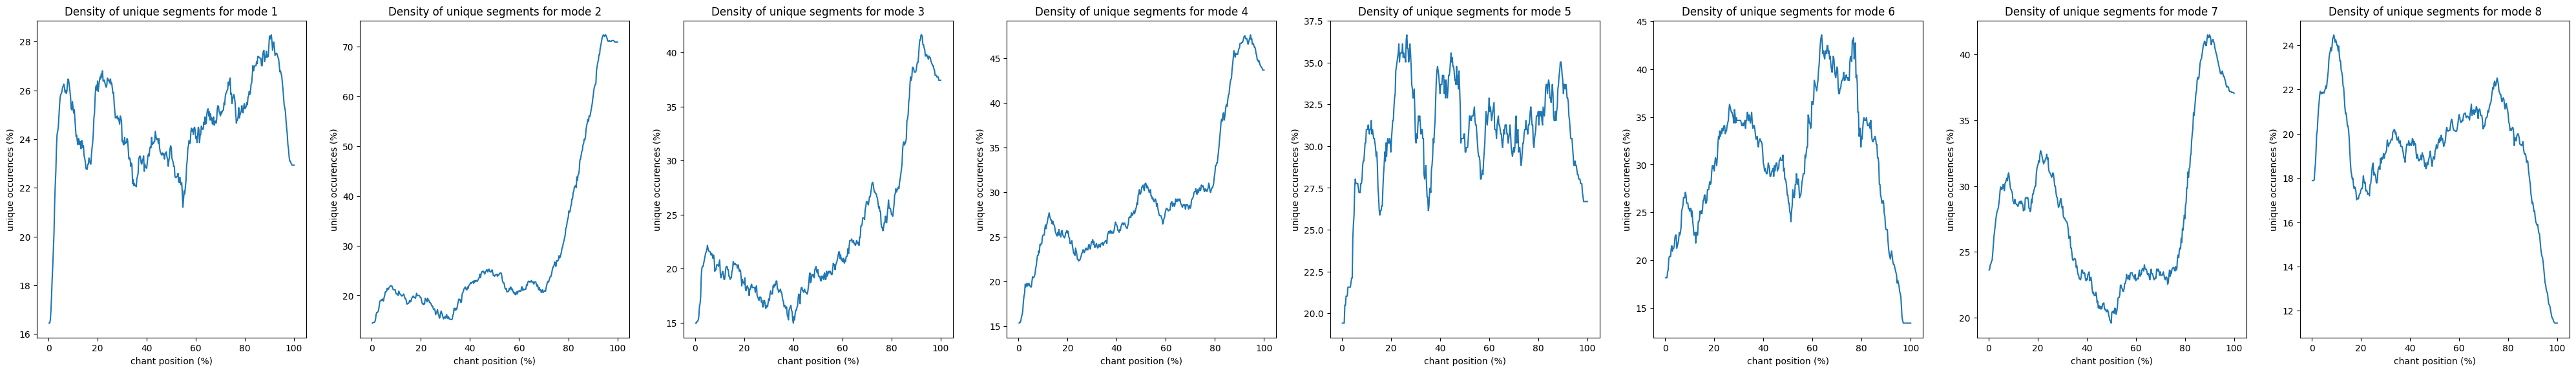

-------------------------------------------------------
----------------------------- Segments Occurences regarding the mode -----------------------------


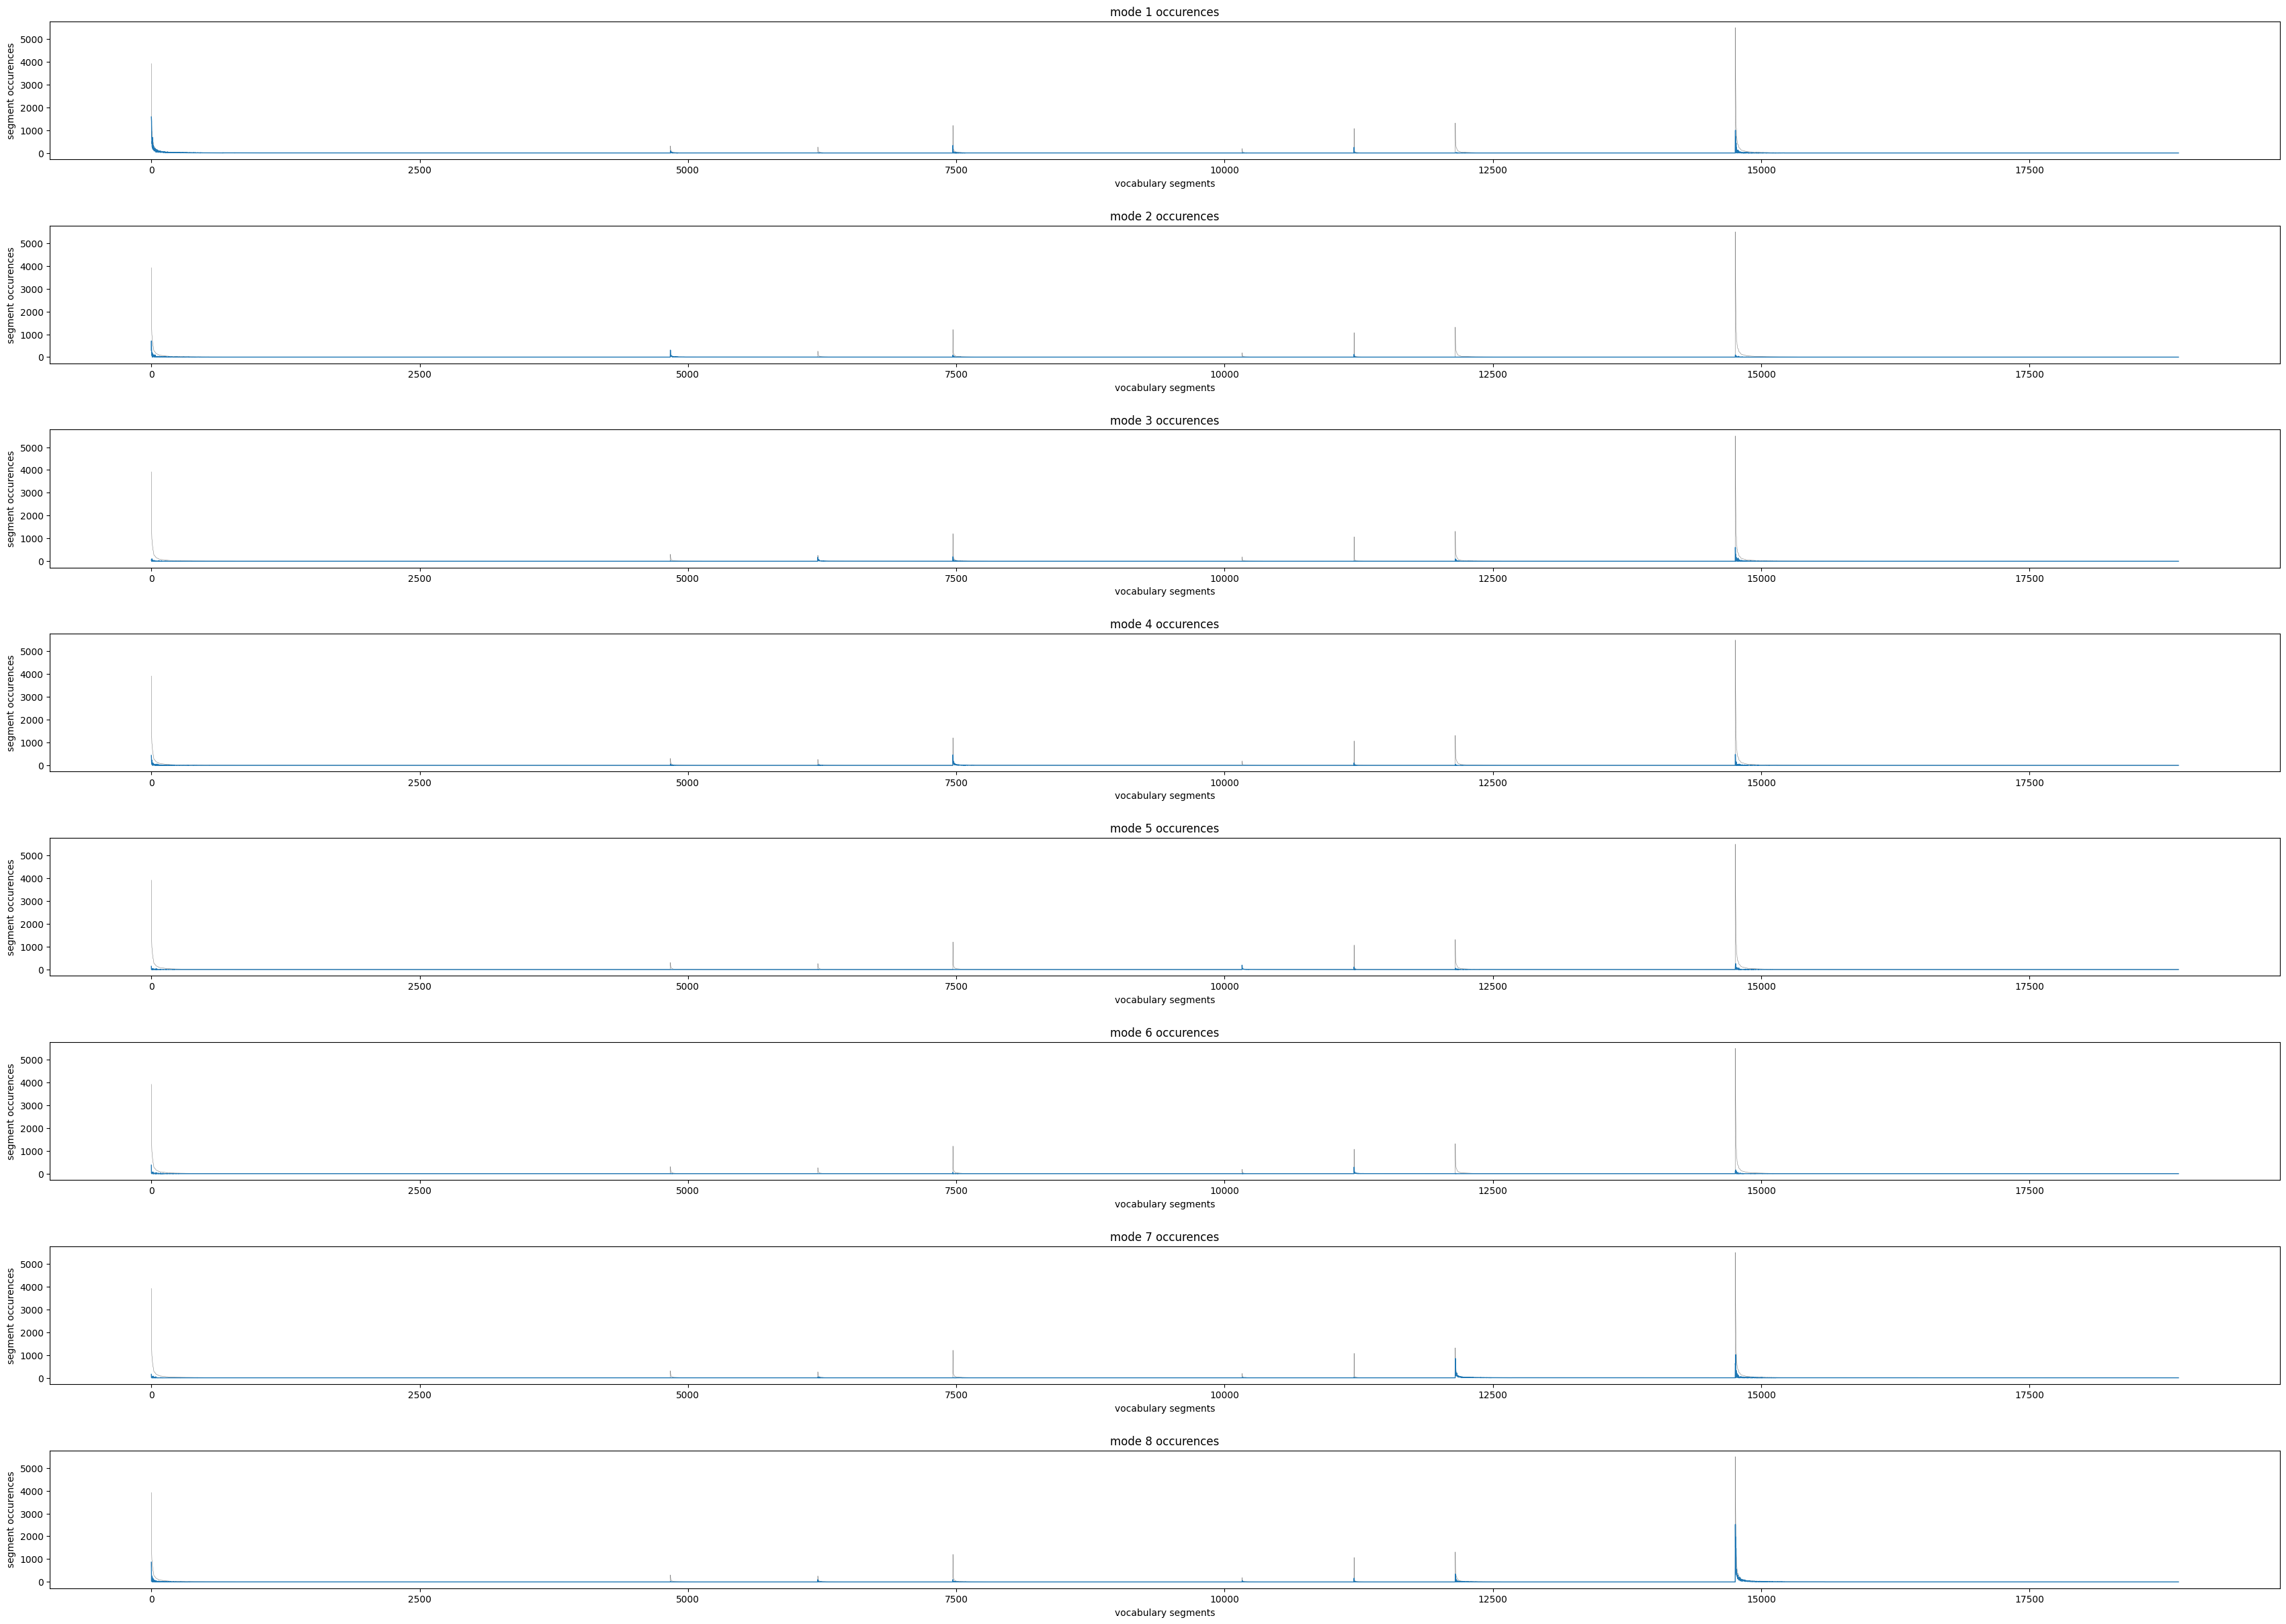

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------






INFO:root:The SVC model was trained with 9706 training data and 4159 testing data.
INFO:root:From model approach - Selected features: 1000 (only 100 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 5493 , Last feature occurences: 204
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:From model approach - reduced bacor accuracy: 94.23%, reduced bacor f1: 94.19% - reduced NB accuracy: 91.46%, reduced NB f1: 91.39%


------------------------------- Test Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 94.76%
			 f1: 94.71%

		 NB accuracy and f1
			 accuracy: 90.17%
			 f1: 90.30%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 11087 unique segments

		 Average Segment Length
			 avgerage: 3.77 tones in one segment

		 Melody Justified With Phrases
			 mjww: -100.00% of segments

		 Melody Justified With Words
			 words justification: 100.00% of segments
			 segments justification: 100.00% of segments
			 average justification: 100.00% of segments

		 Weighted Top Mode Frequency
			 wtmf: 63.00% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.23 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 5.86 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


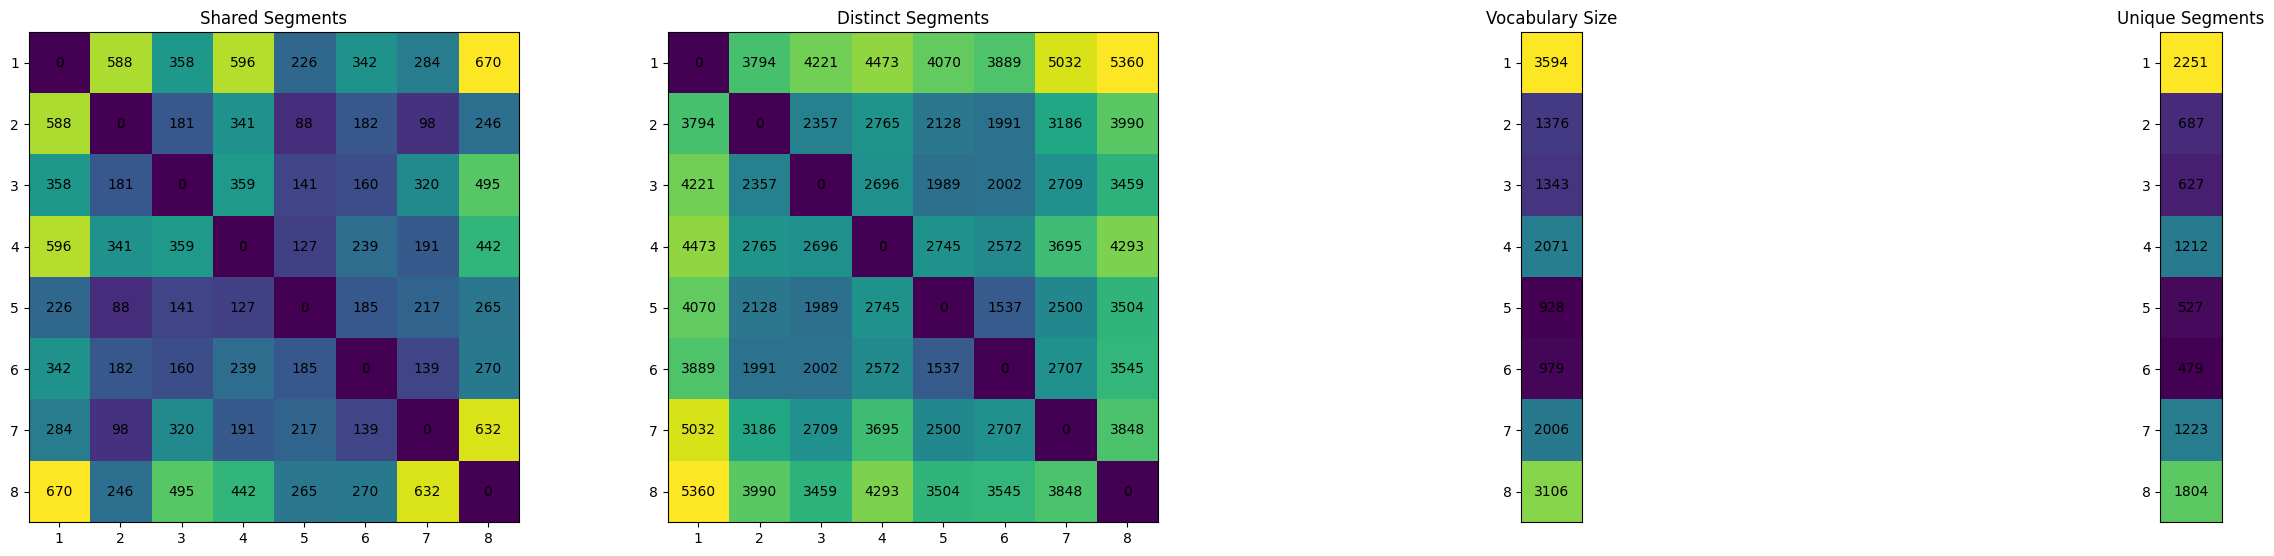

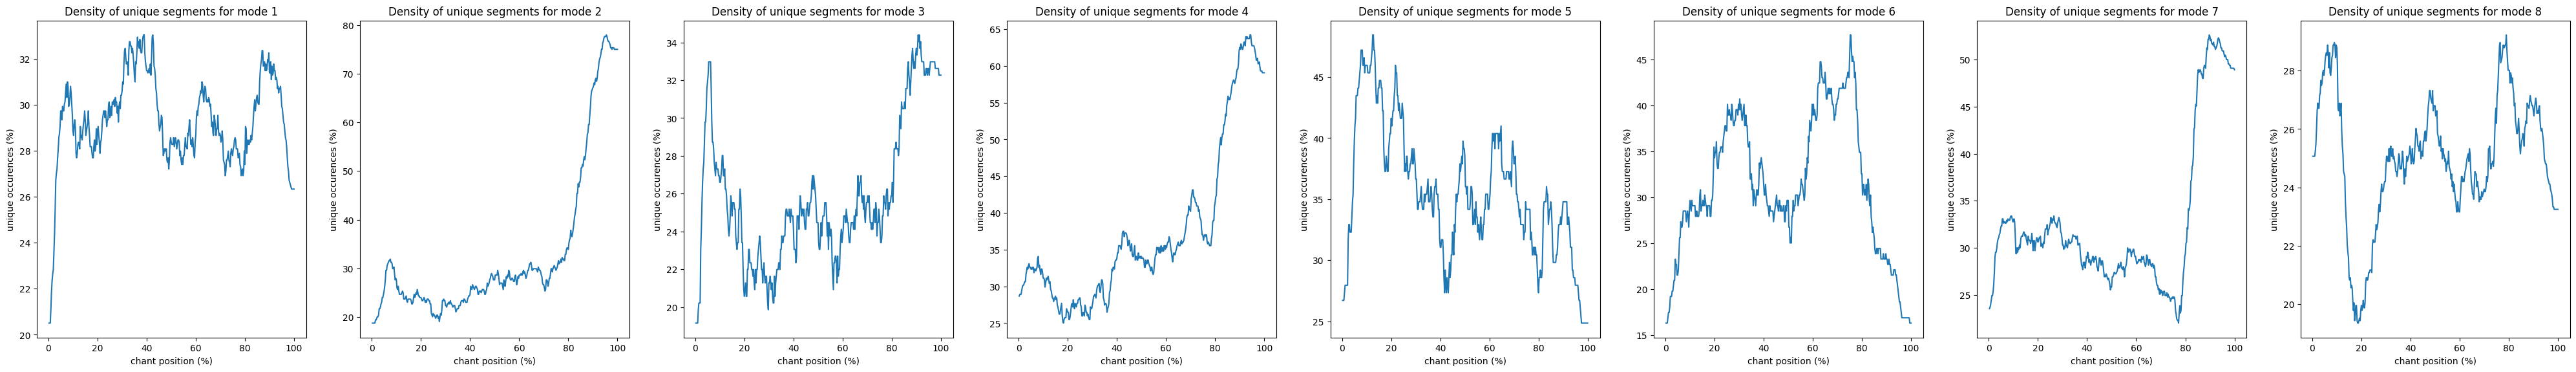

-------------------------------------------------------
----------------------------- Segments Occurences regarding the mode -----------------------------


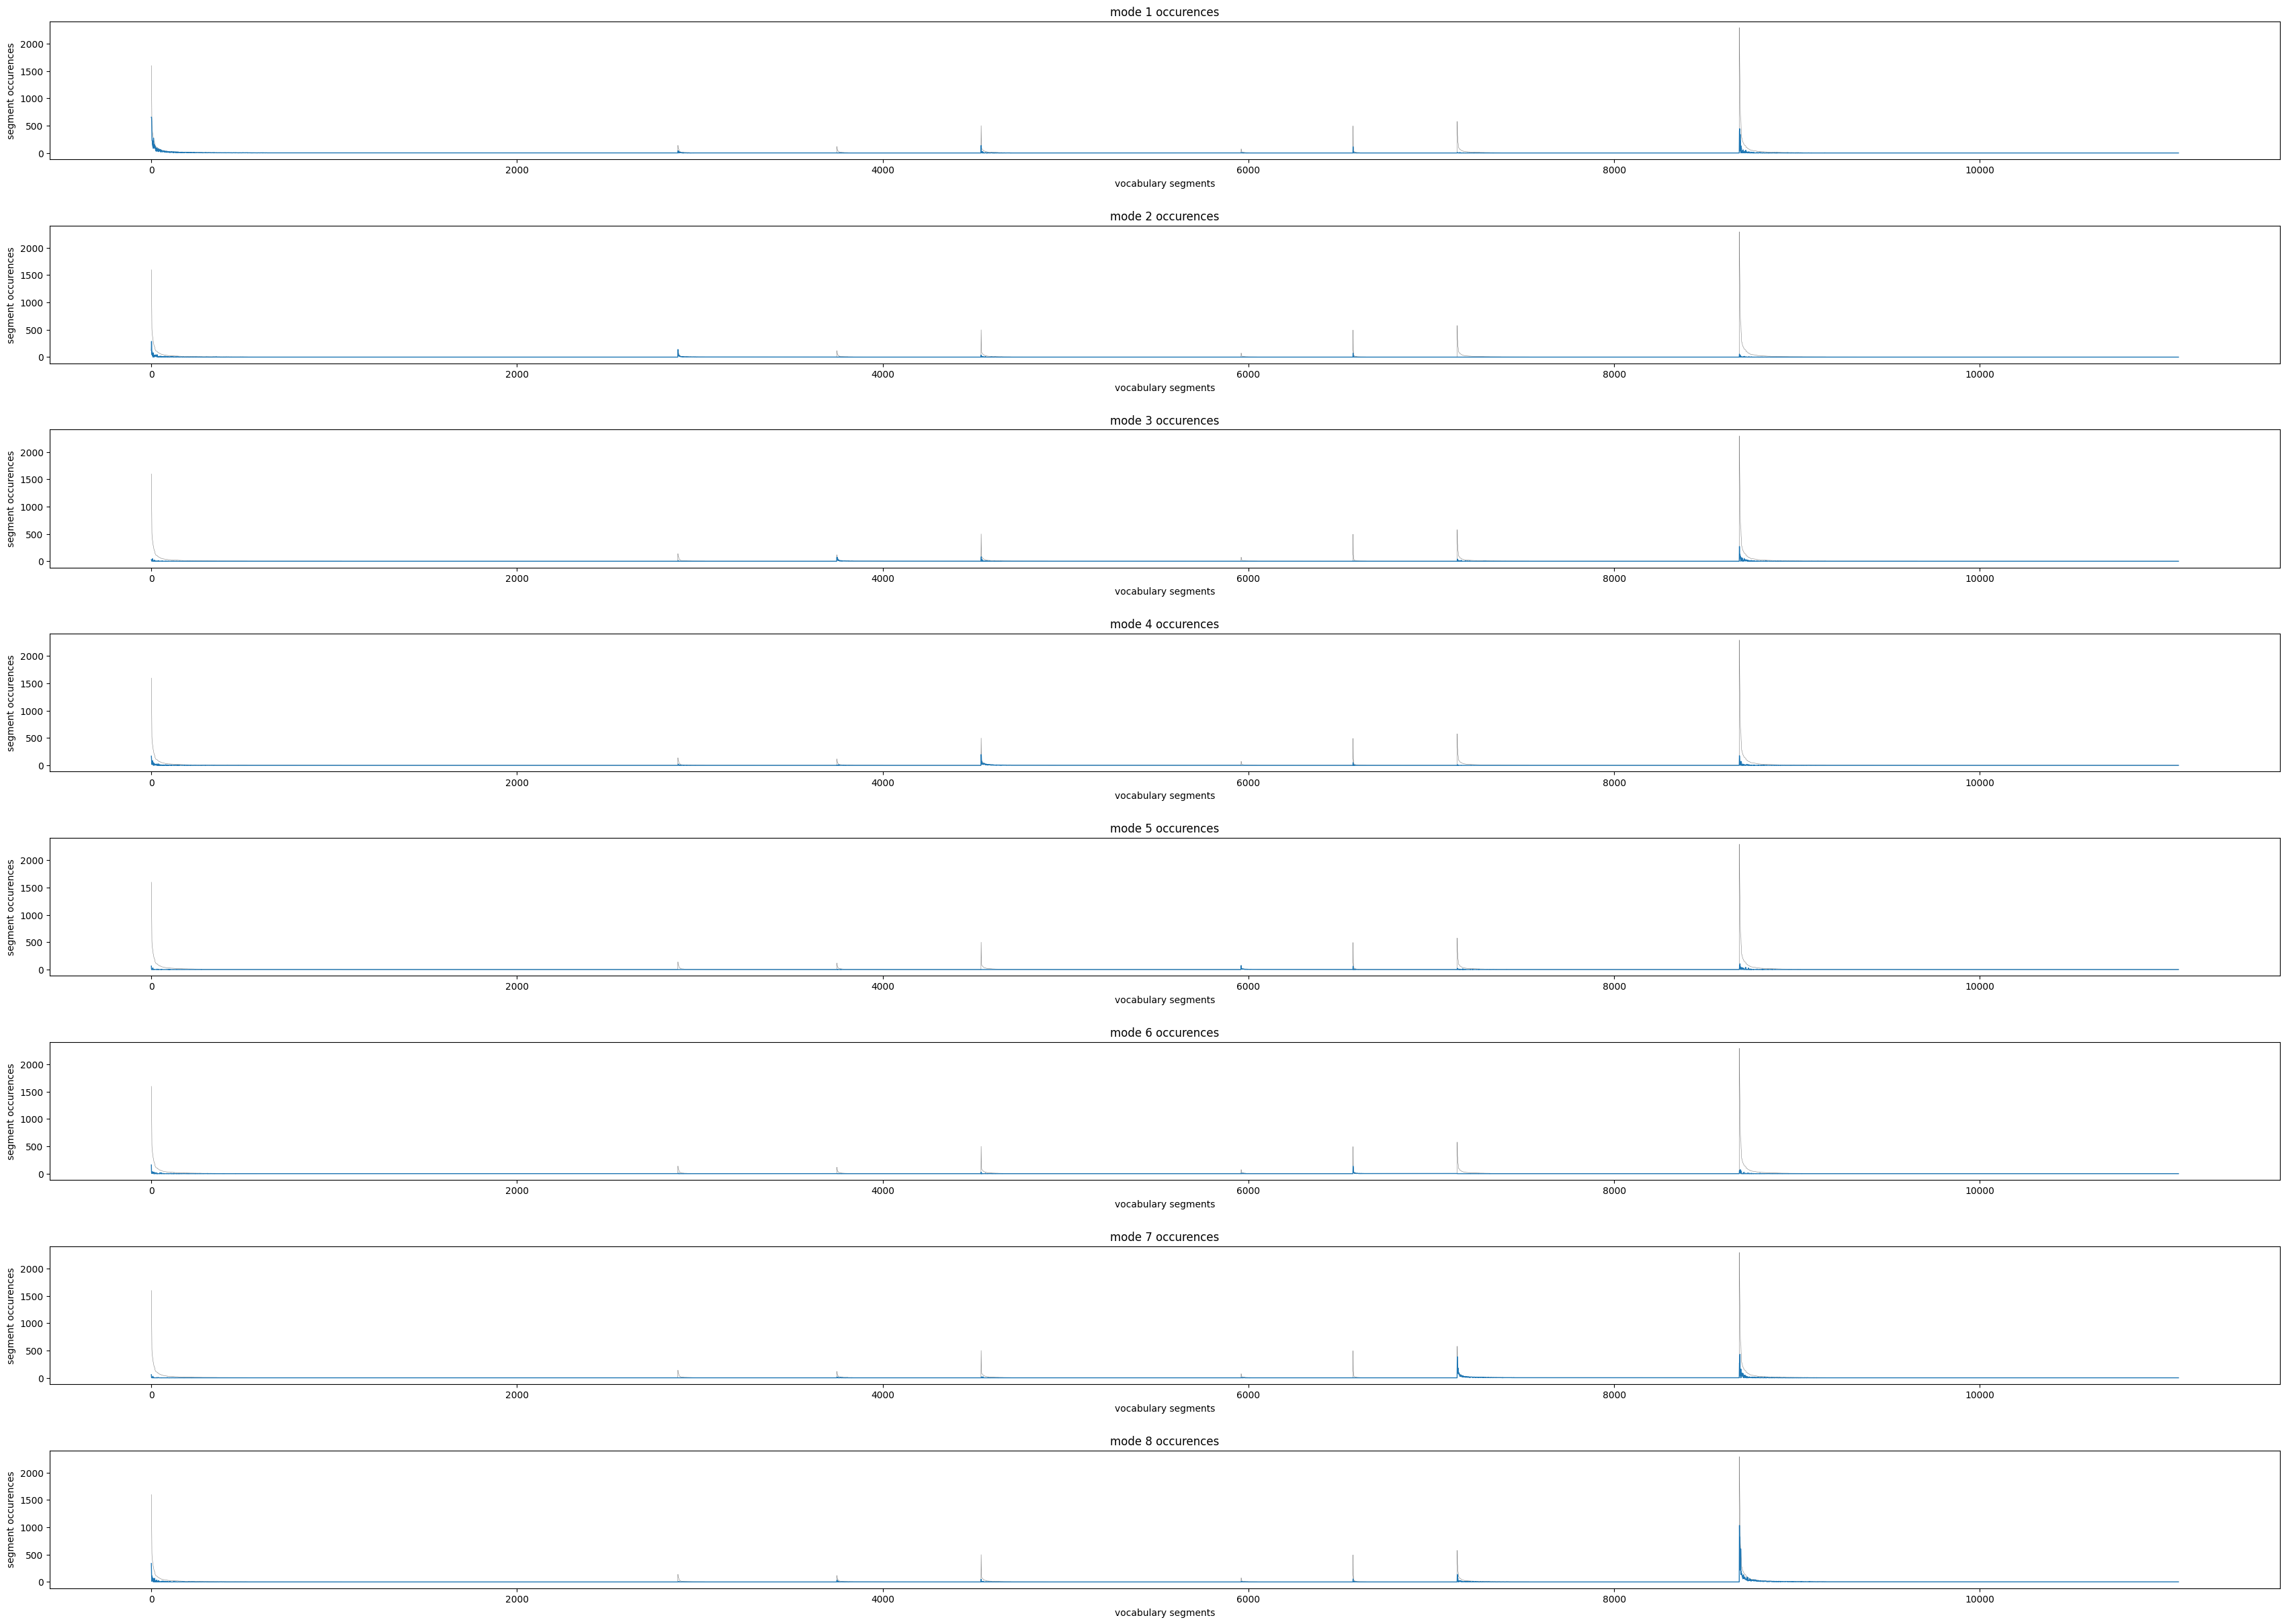

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------




Top selected melodies - from model: ['g', 'h', 'f', 'gg', 'd', 'k', 'hg', 'dd', 'gh', 'kkjkhg', 'hgf', 'l', 'fg', 'e', 'kk', 'gf', 'ff', 'ghg', 'c', 'ef', 'cd', 'fe', 'j', 'hh', 'fghh', 'ghh', 'hhgfghg', 'jk', 'kj', 'hk', 'fed', 'ee', 'dc', 'hgg', 'll', 'fgh', 'fh', 'kjh', 'gfe', 'fgf', 'efg', 'hgh', 'kkk', 'llmlkjh', 'fghg', 'kh', 'lml', 'ggg', 'dcdd', 'kkj', 'ghgf', 'ggh', 'ghhgg', 'fedd', 'fgg', 'ghk', 'gfgg', 'ddc', 'gF', 'hkk', 'hkj', 'fffecd', 'cdf', 'fd', 'lm', 'de', 'fef', 'fedc', 'efgfe', 'ghkk', 'ed', 'gfed', 'def', 'hhg', 'klk', 'hhfghgf', 'hghg', 'gghg', 'lkj', 'fE', 'jh', 'hgfg', 'ml', 'ghgg', 'dfedd', 'efgg', 'kjhg', 'lj', 'ggf', 'cdd', 'gfedd', 'dcd', 'dfe', 'm', 'jhg', 'kjg', 'llmlkjk', 'kkhklk', 'khg', 'fff']


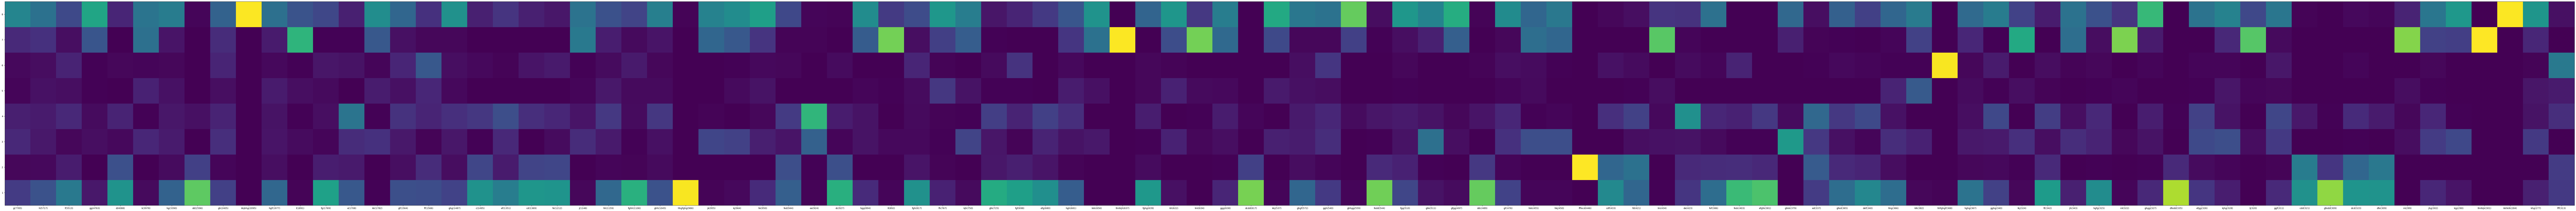

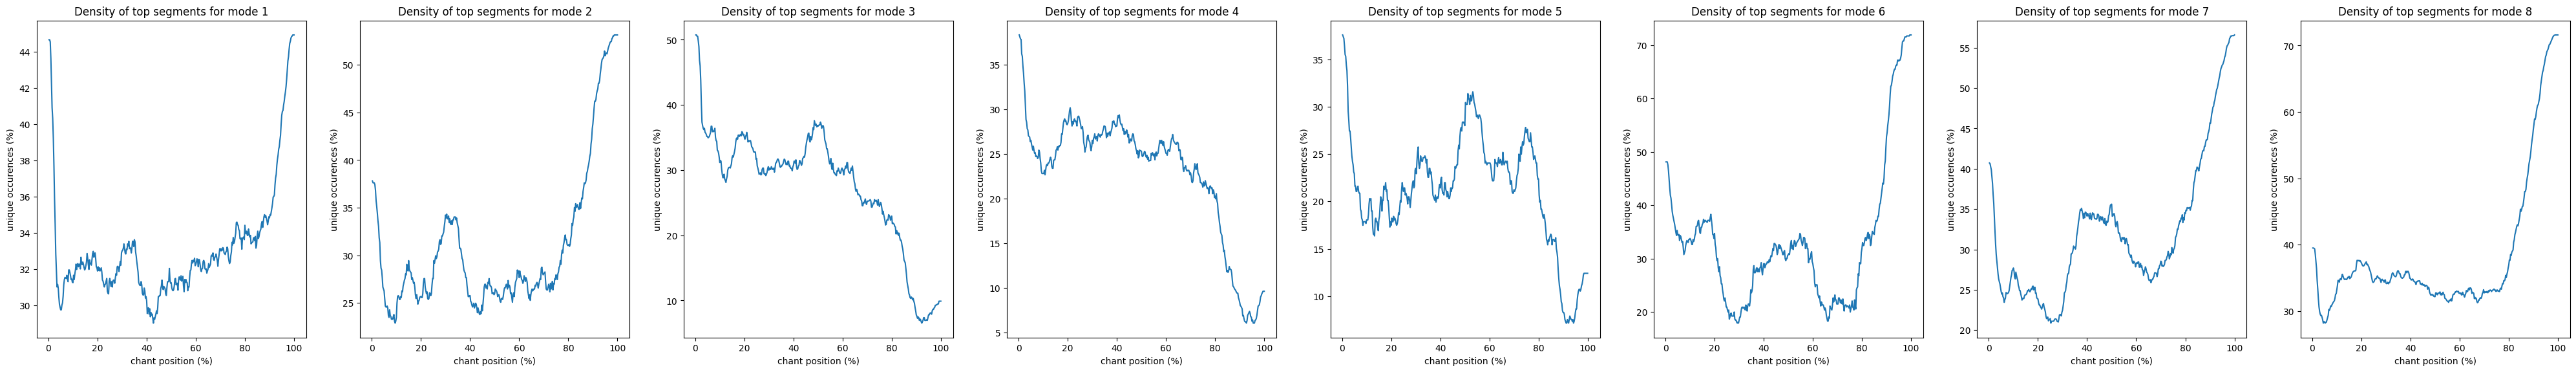





------------------------- Train + Test data charts ----------------------------
------------- Modes Vocabulary Statistics -------------


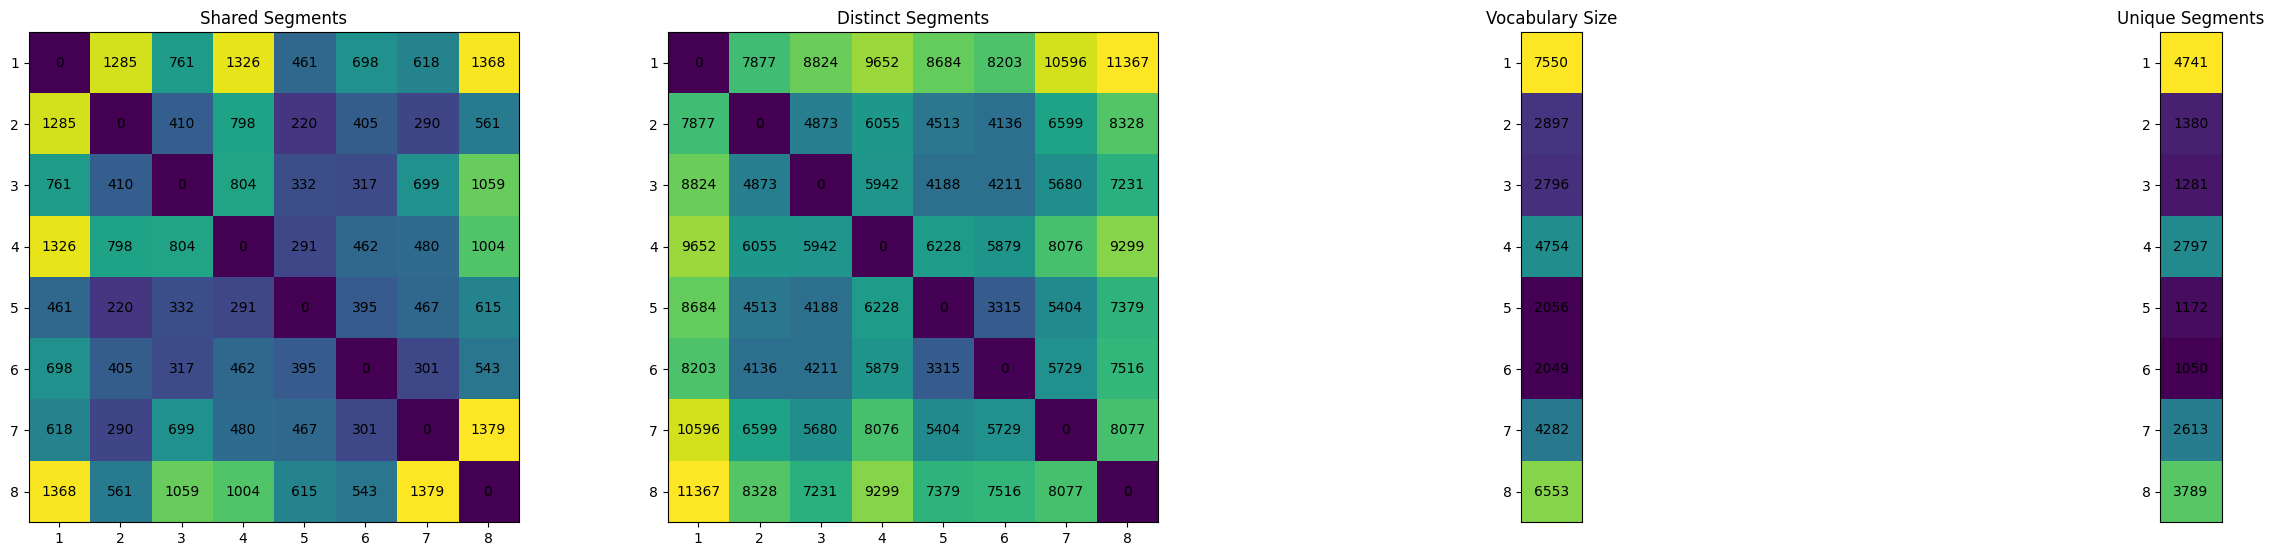

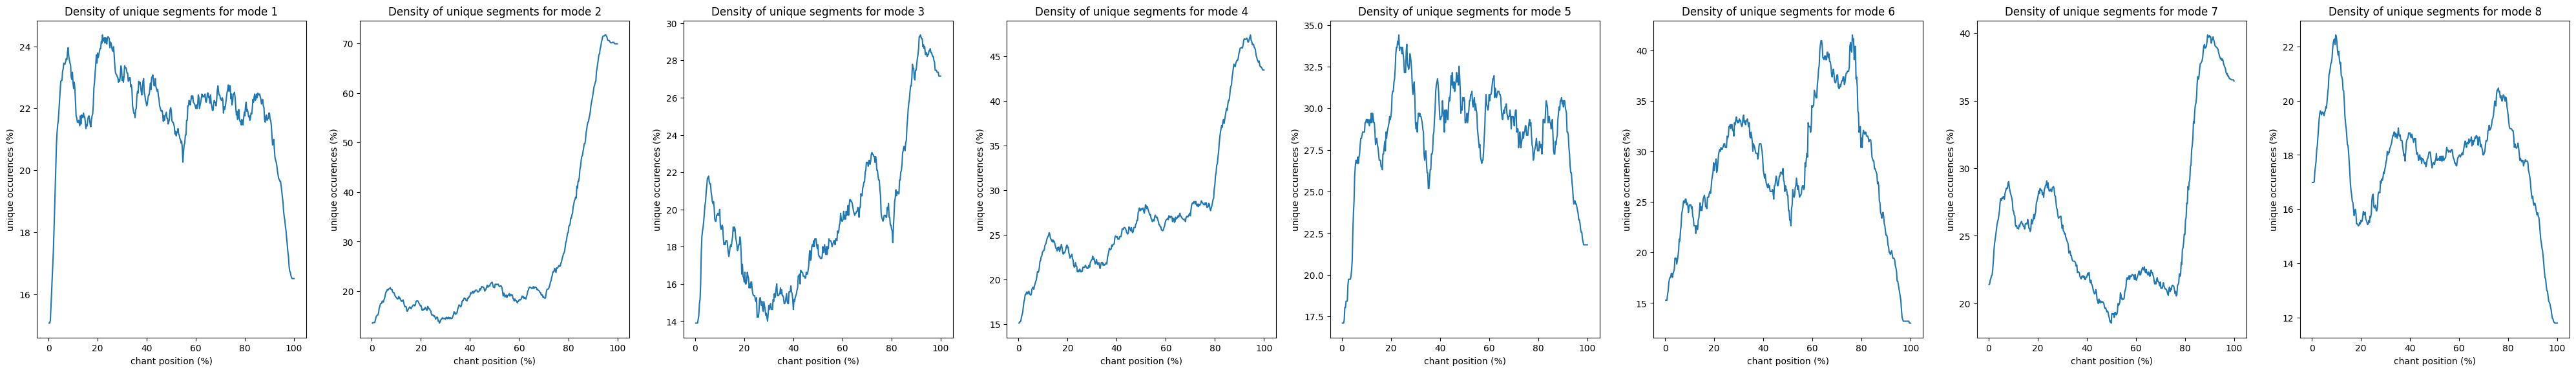

-------------------------------------------------------
------------------------------------------------------------------------


In [ ]:
from src.utils.loader import prepare_dataset, load_word_segmentations
from src.eval.pipelines import evaluation_pipeline


# Get Data
_, y = prepare_dataset()
y_train, y_test = y[:9706].tolist(), y[9706:].tolist()
word_segmentations = load_word_segmentations()
train_segmentation, test_segmentation = word_segmentations[:9706], word_segmentations[9706:]
# Evaluate model
bacor_model = evaluation_pipeline(
    train_segmentation, y_train, test_segmentation, y_test,
    max_features_from_model = 100, include_additative = False, fe_occurence_coef=10)

## Random Segmentation

INFO:root:Number of chants: 13865


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:The SVC model was trained with 9706 training data and 9706 testing data.
INFO:root:From model approach - Selected features: 1000 (only 100 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2646 , Last feature occurences: 127
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sk

------------------------------- Train Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 98.06%
			 f1: 98.06%

		 NB accuracy and f1
			 accuracy: 96.55%
			 f1: 96.56%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 31444 unique segments

		 Average Segment Length
			 avgerage: 4.28 tones in one segment

		 Melody Justified With Words
			 words justification: 30.74% of segments
			 segments justification: 26.99% of segments
			 average justification: 28.87% of segments

		 Weighted Top Mode Frequency
			 wtmf: 64.54% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.23 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 5.39 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


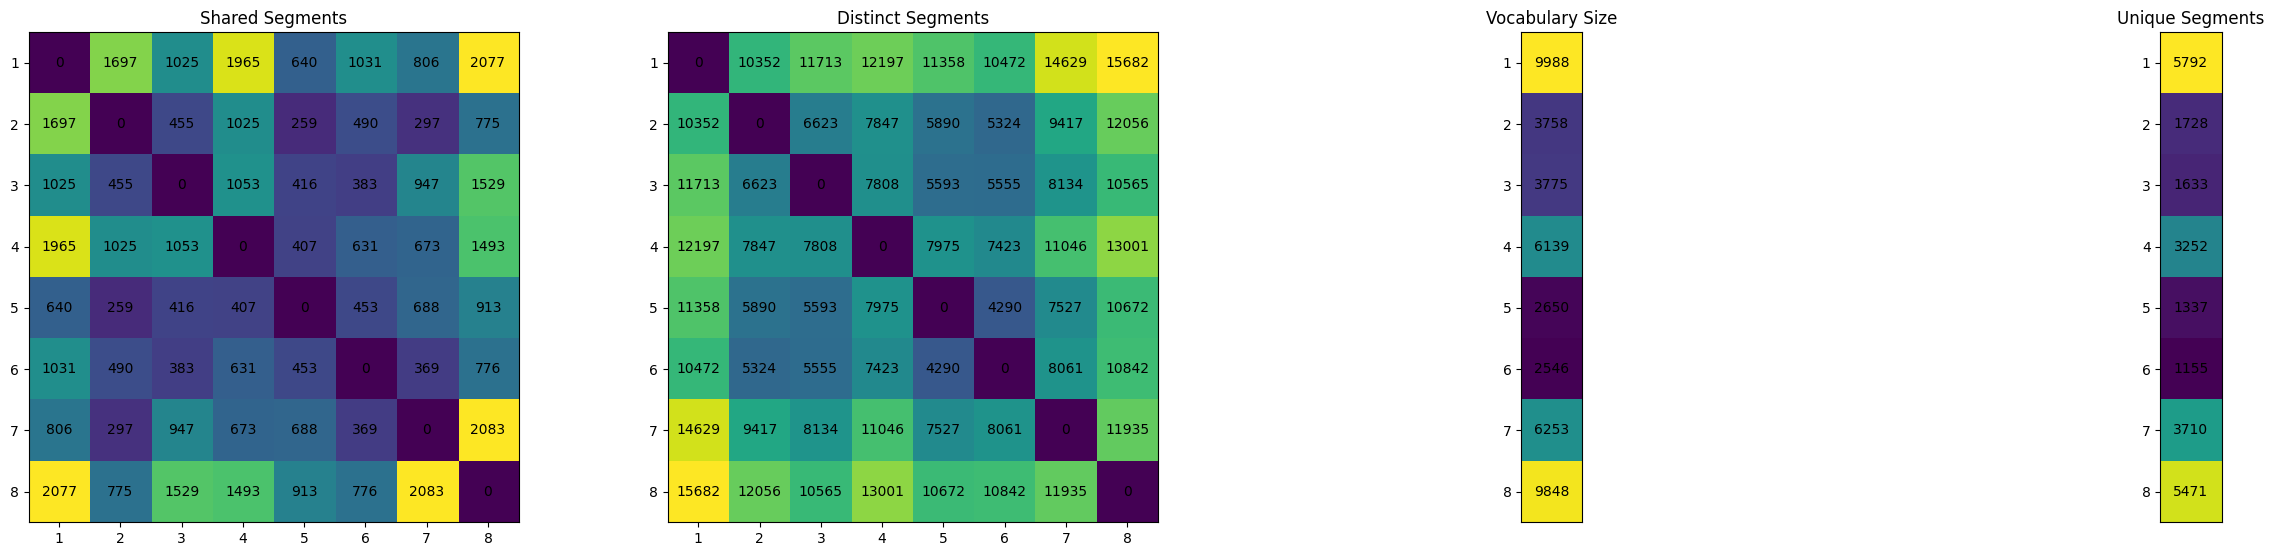

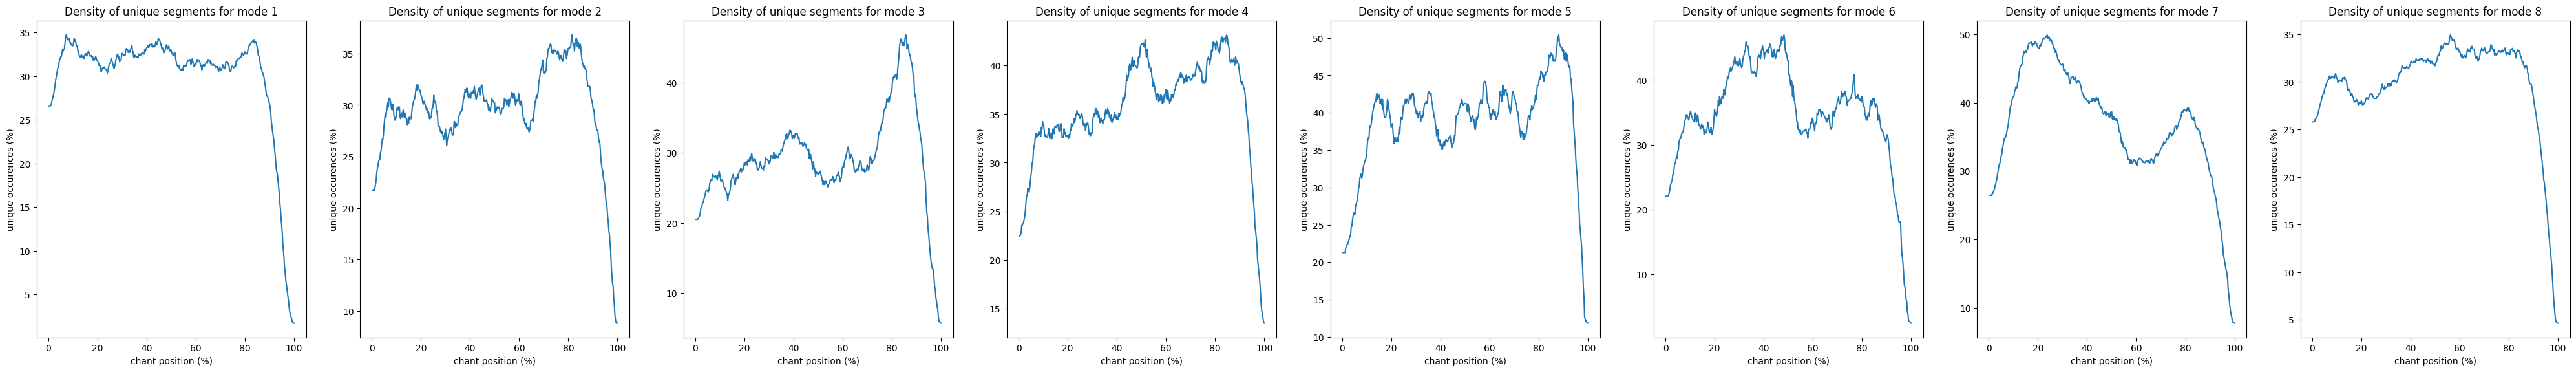

-------------------------------------------------------
----------------------------- Segments Occurences regarding the mode -----------------------------


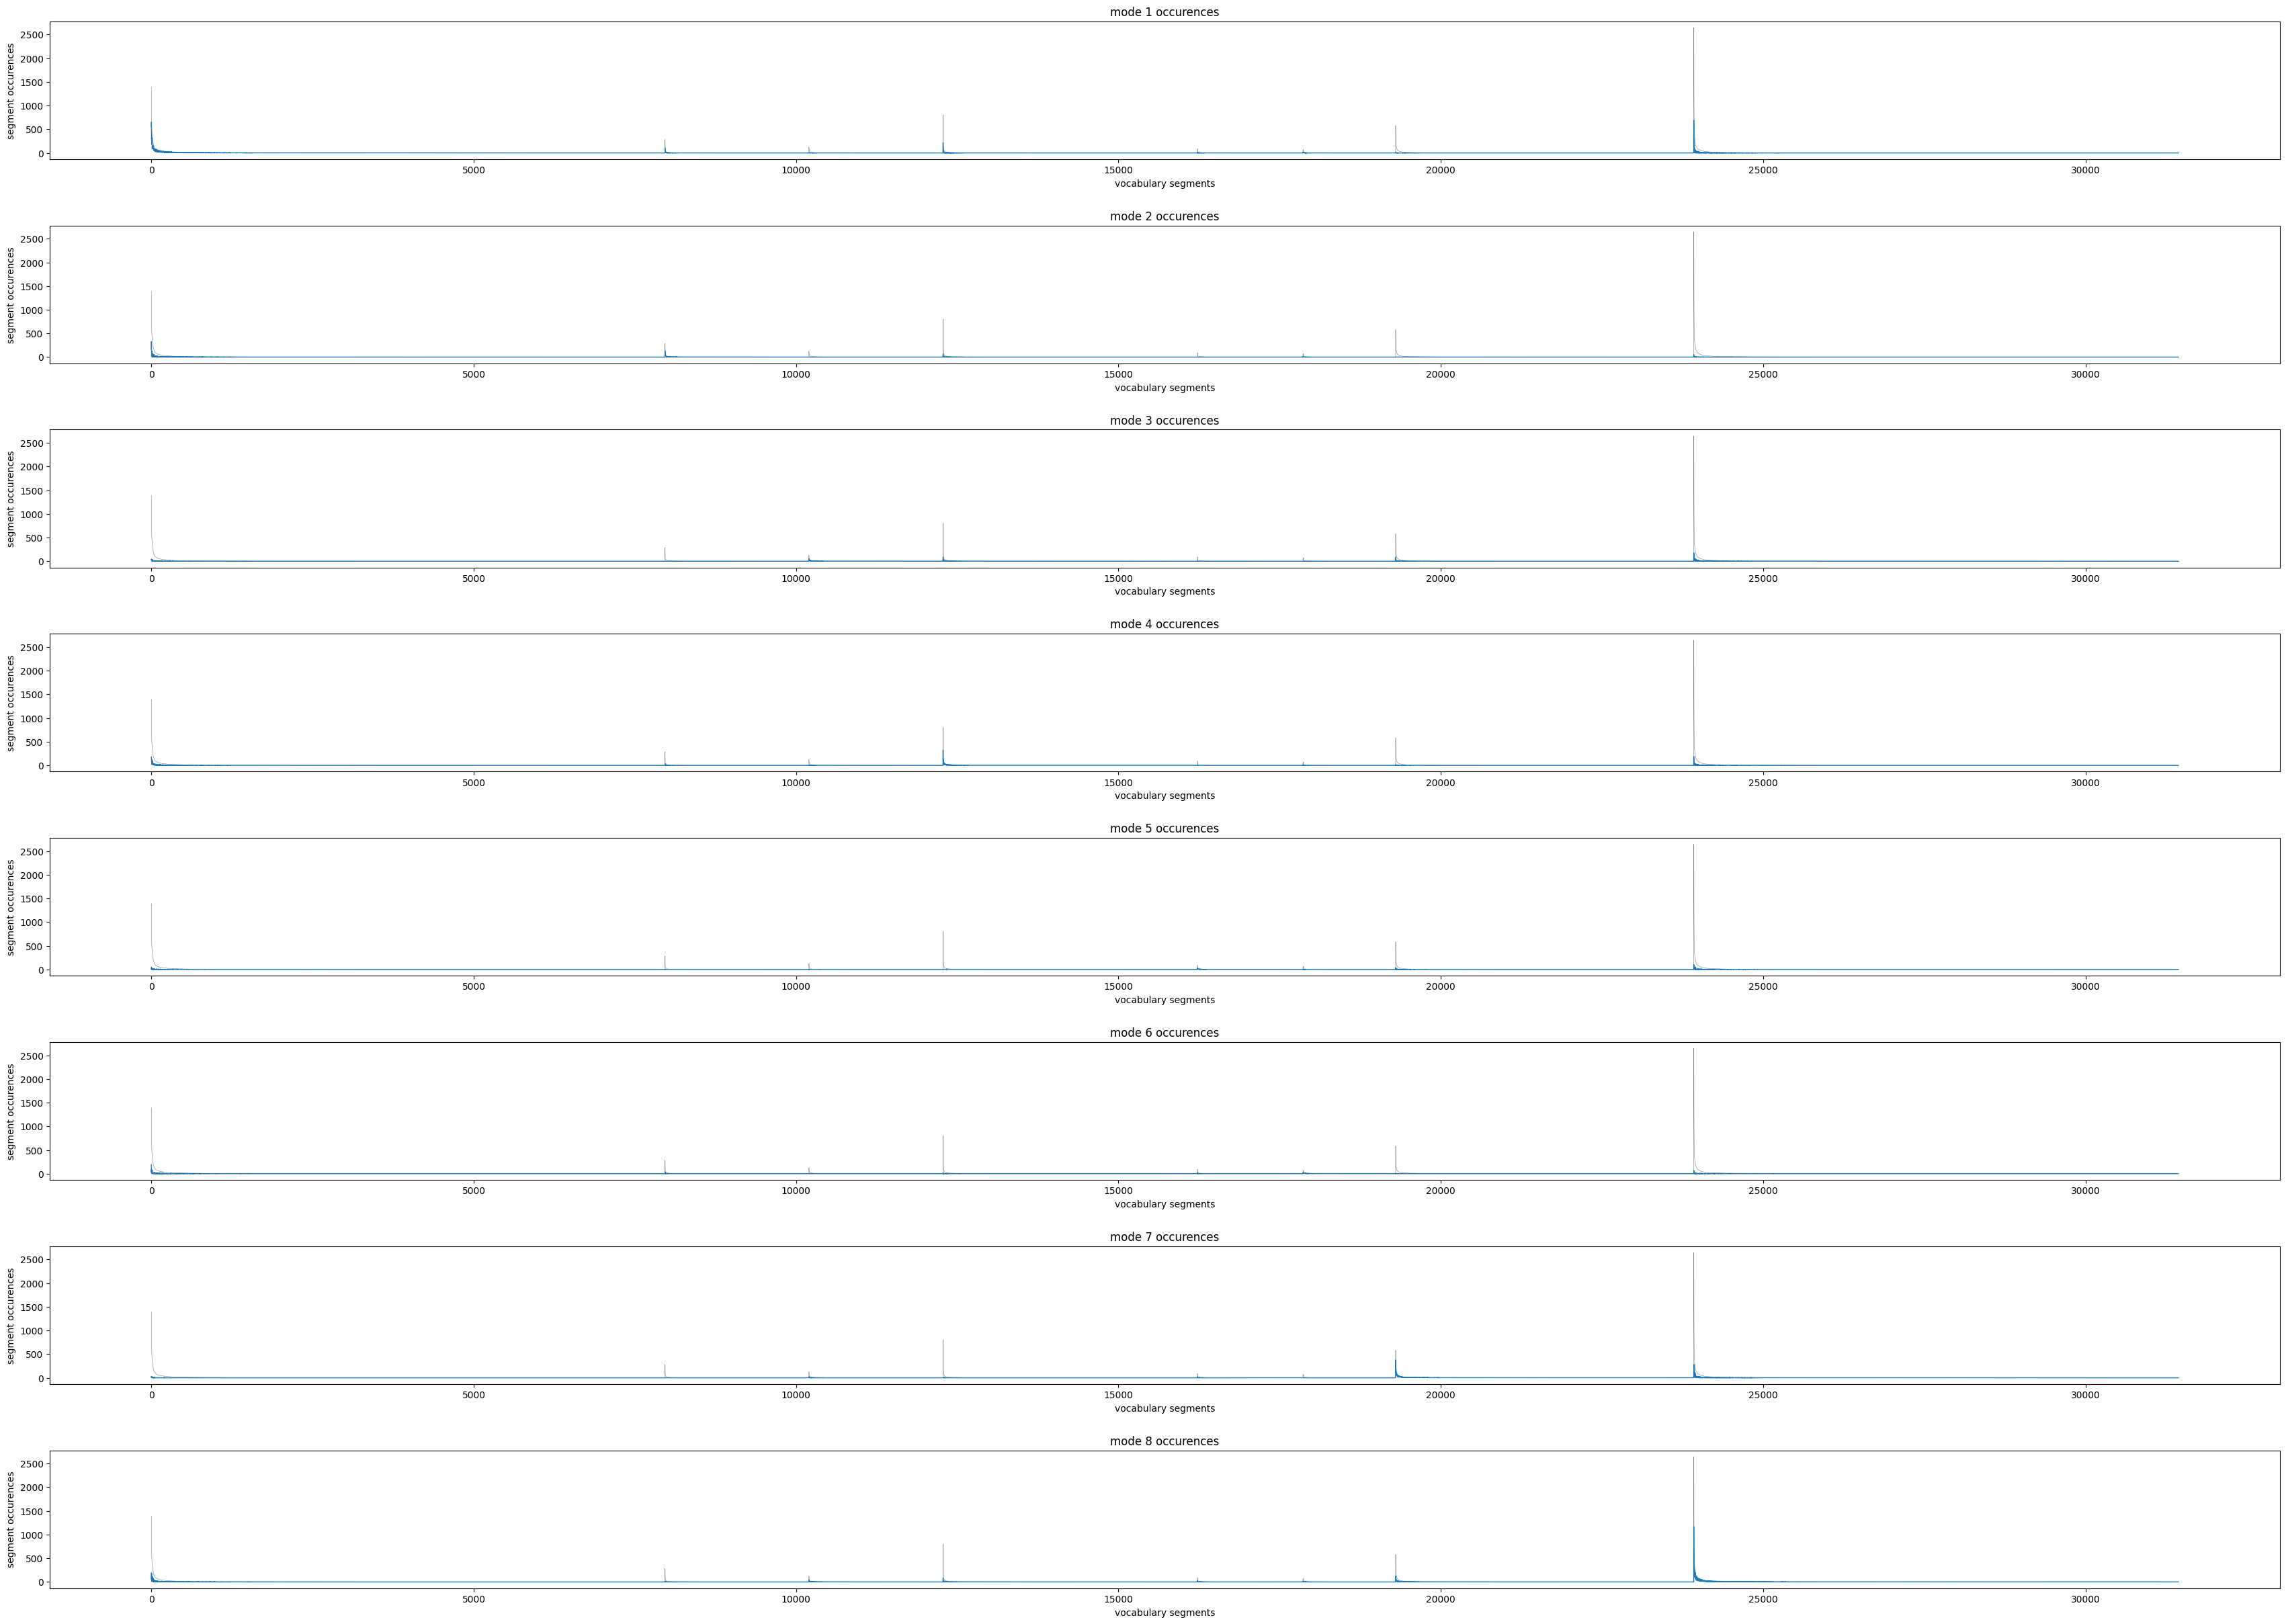

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------






INFO:root:The SVC model was trained with 9706 training data and 4159 testing data.
INFO:root:From model approach - Selected features: 1000 (only 100 of them will be chosen)
INFO:root:From model approach Train data - First feature occurences: 2646 , Last feature occurences: 127
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
INFO:root:From model approach - reduced bacor accuracy: 82.90%, reduced bacor f1: 82.65% - reduced NB accuracy: 80.43%, reduced NB f1: 79.65%


------------------------------- Test Scores -------------------------------

		 bacor accuracy and f1
			 accuracy: 87.21%
			 f1: 86.95%

		 NB accuracy and f1
			 accuracy: 80.19%
			 f1: 81.18%

		 Perplexity
			 -1.000000

		 Vocabulary Size
			 size: 17916 unique segments

		 Average Segment Length
			 avgerage: 4.30 tones in one segment

		 Melody Justified With Phrases
			 mjww: 58.28% of segments

		 Melody Justified With Words
			 words justification: 30.68% of segments
			 segments justification: 26.94% of segments
			 average justification: 28.81% of segments

		 Weighted Top Mode Frequency
			 wtmf: 67.29% of melodies

		 Weighted Unique Final Pitch Count
			 wufpc: 6.30 final pitches for a chant

		 Vocabulary Levenhstein Score
			 wufpc: 5.25 final pitches for a chant
------------- Modes Vocabulary Statistics -------------


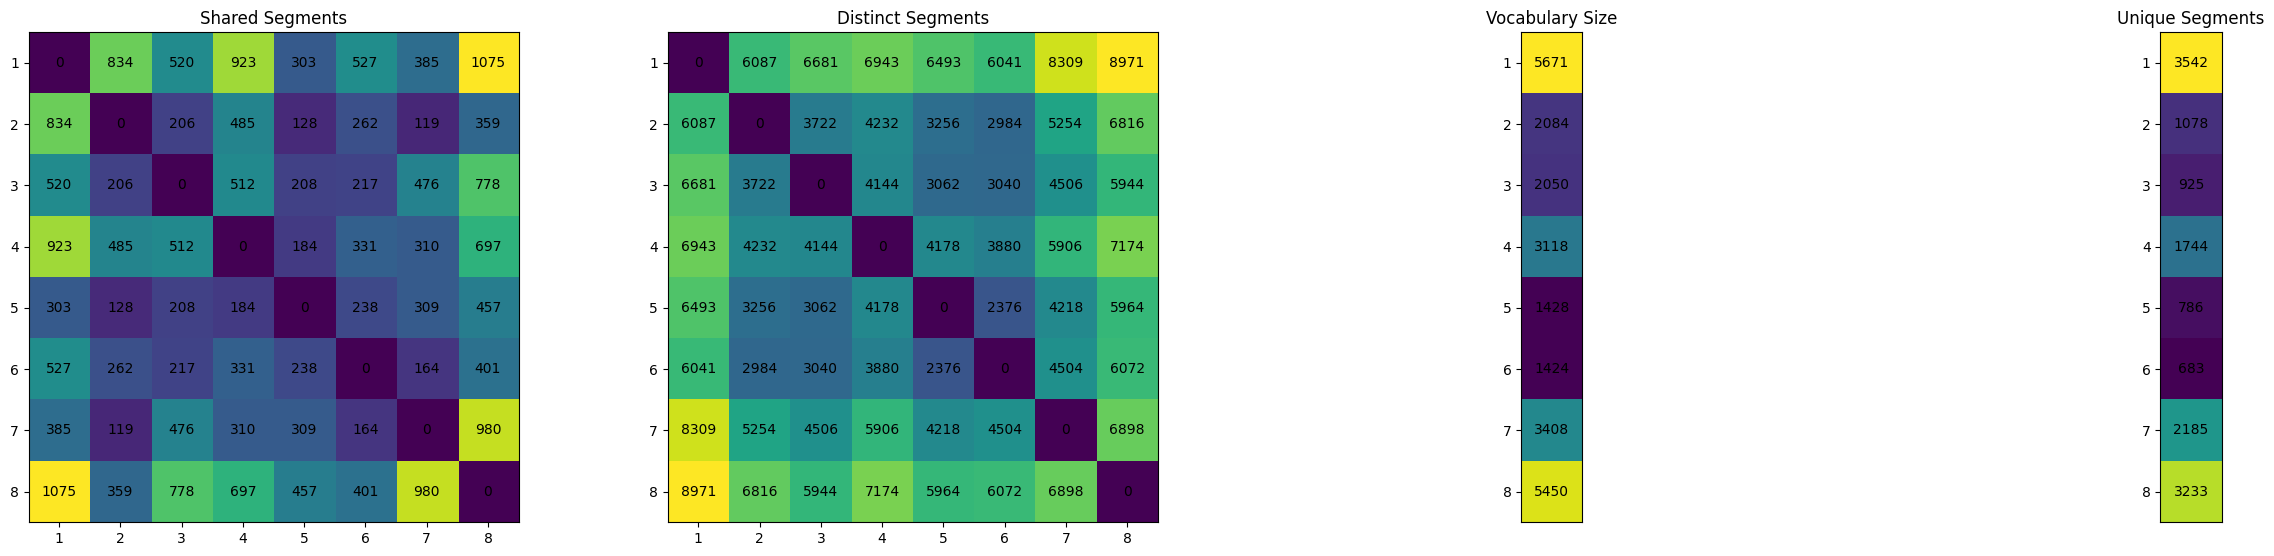

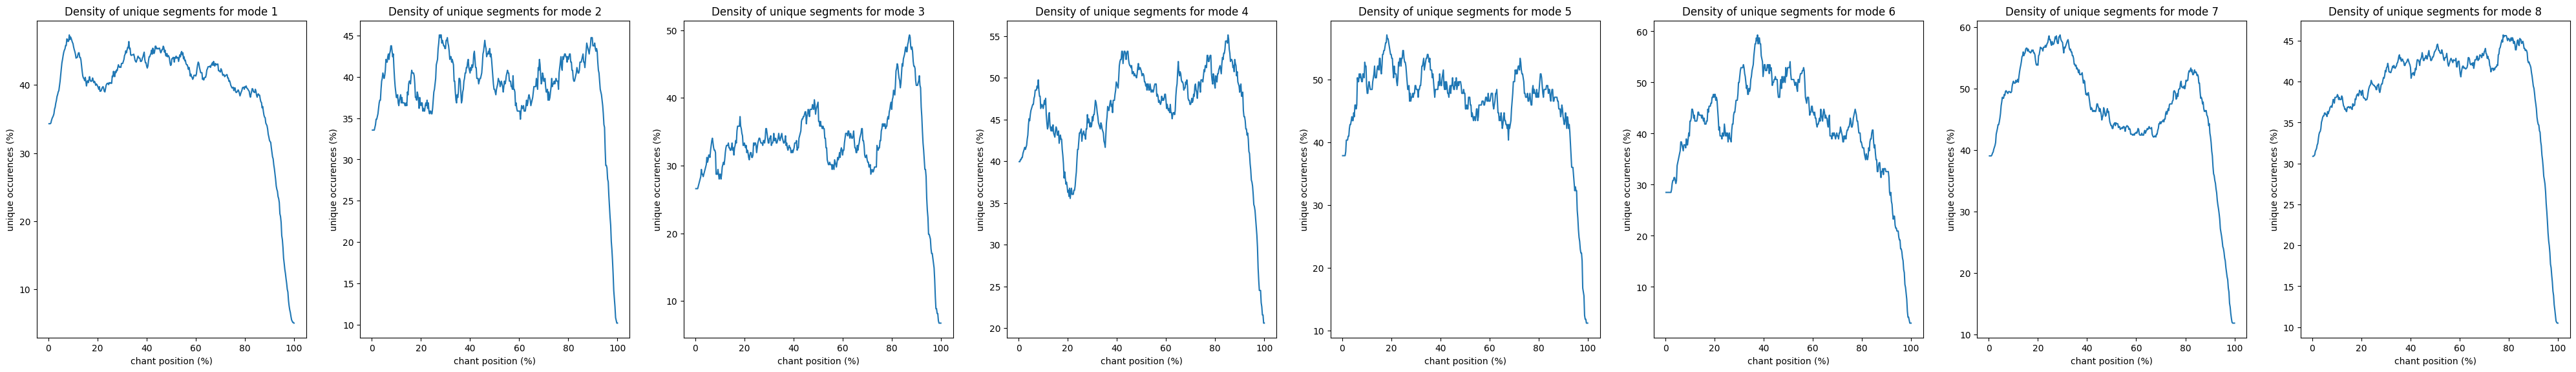

-------------------------------------------------------
----------------------------- Segments Occurences regarding the mode -----------------------------


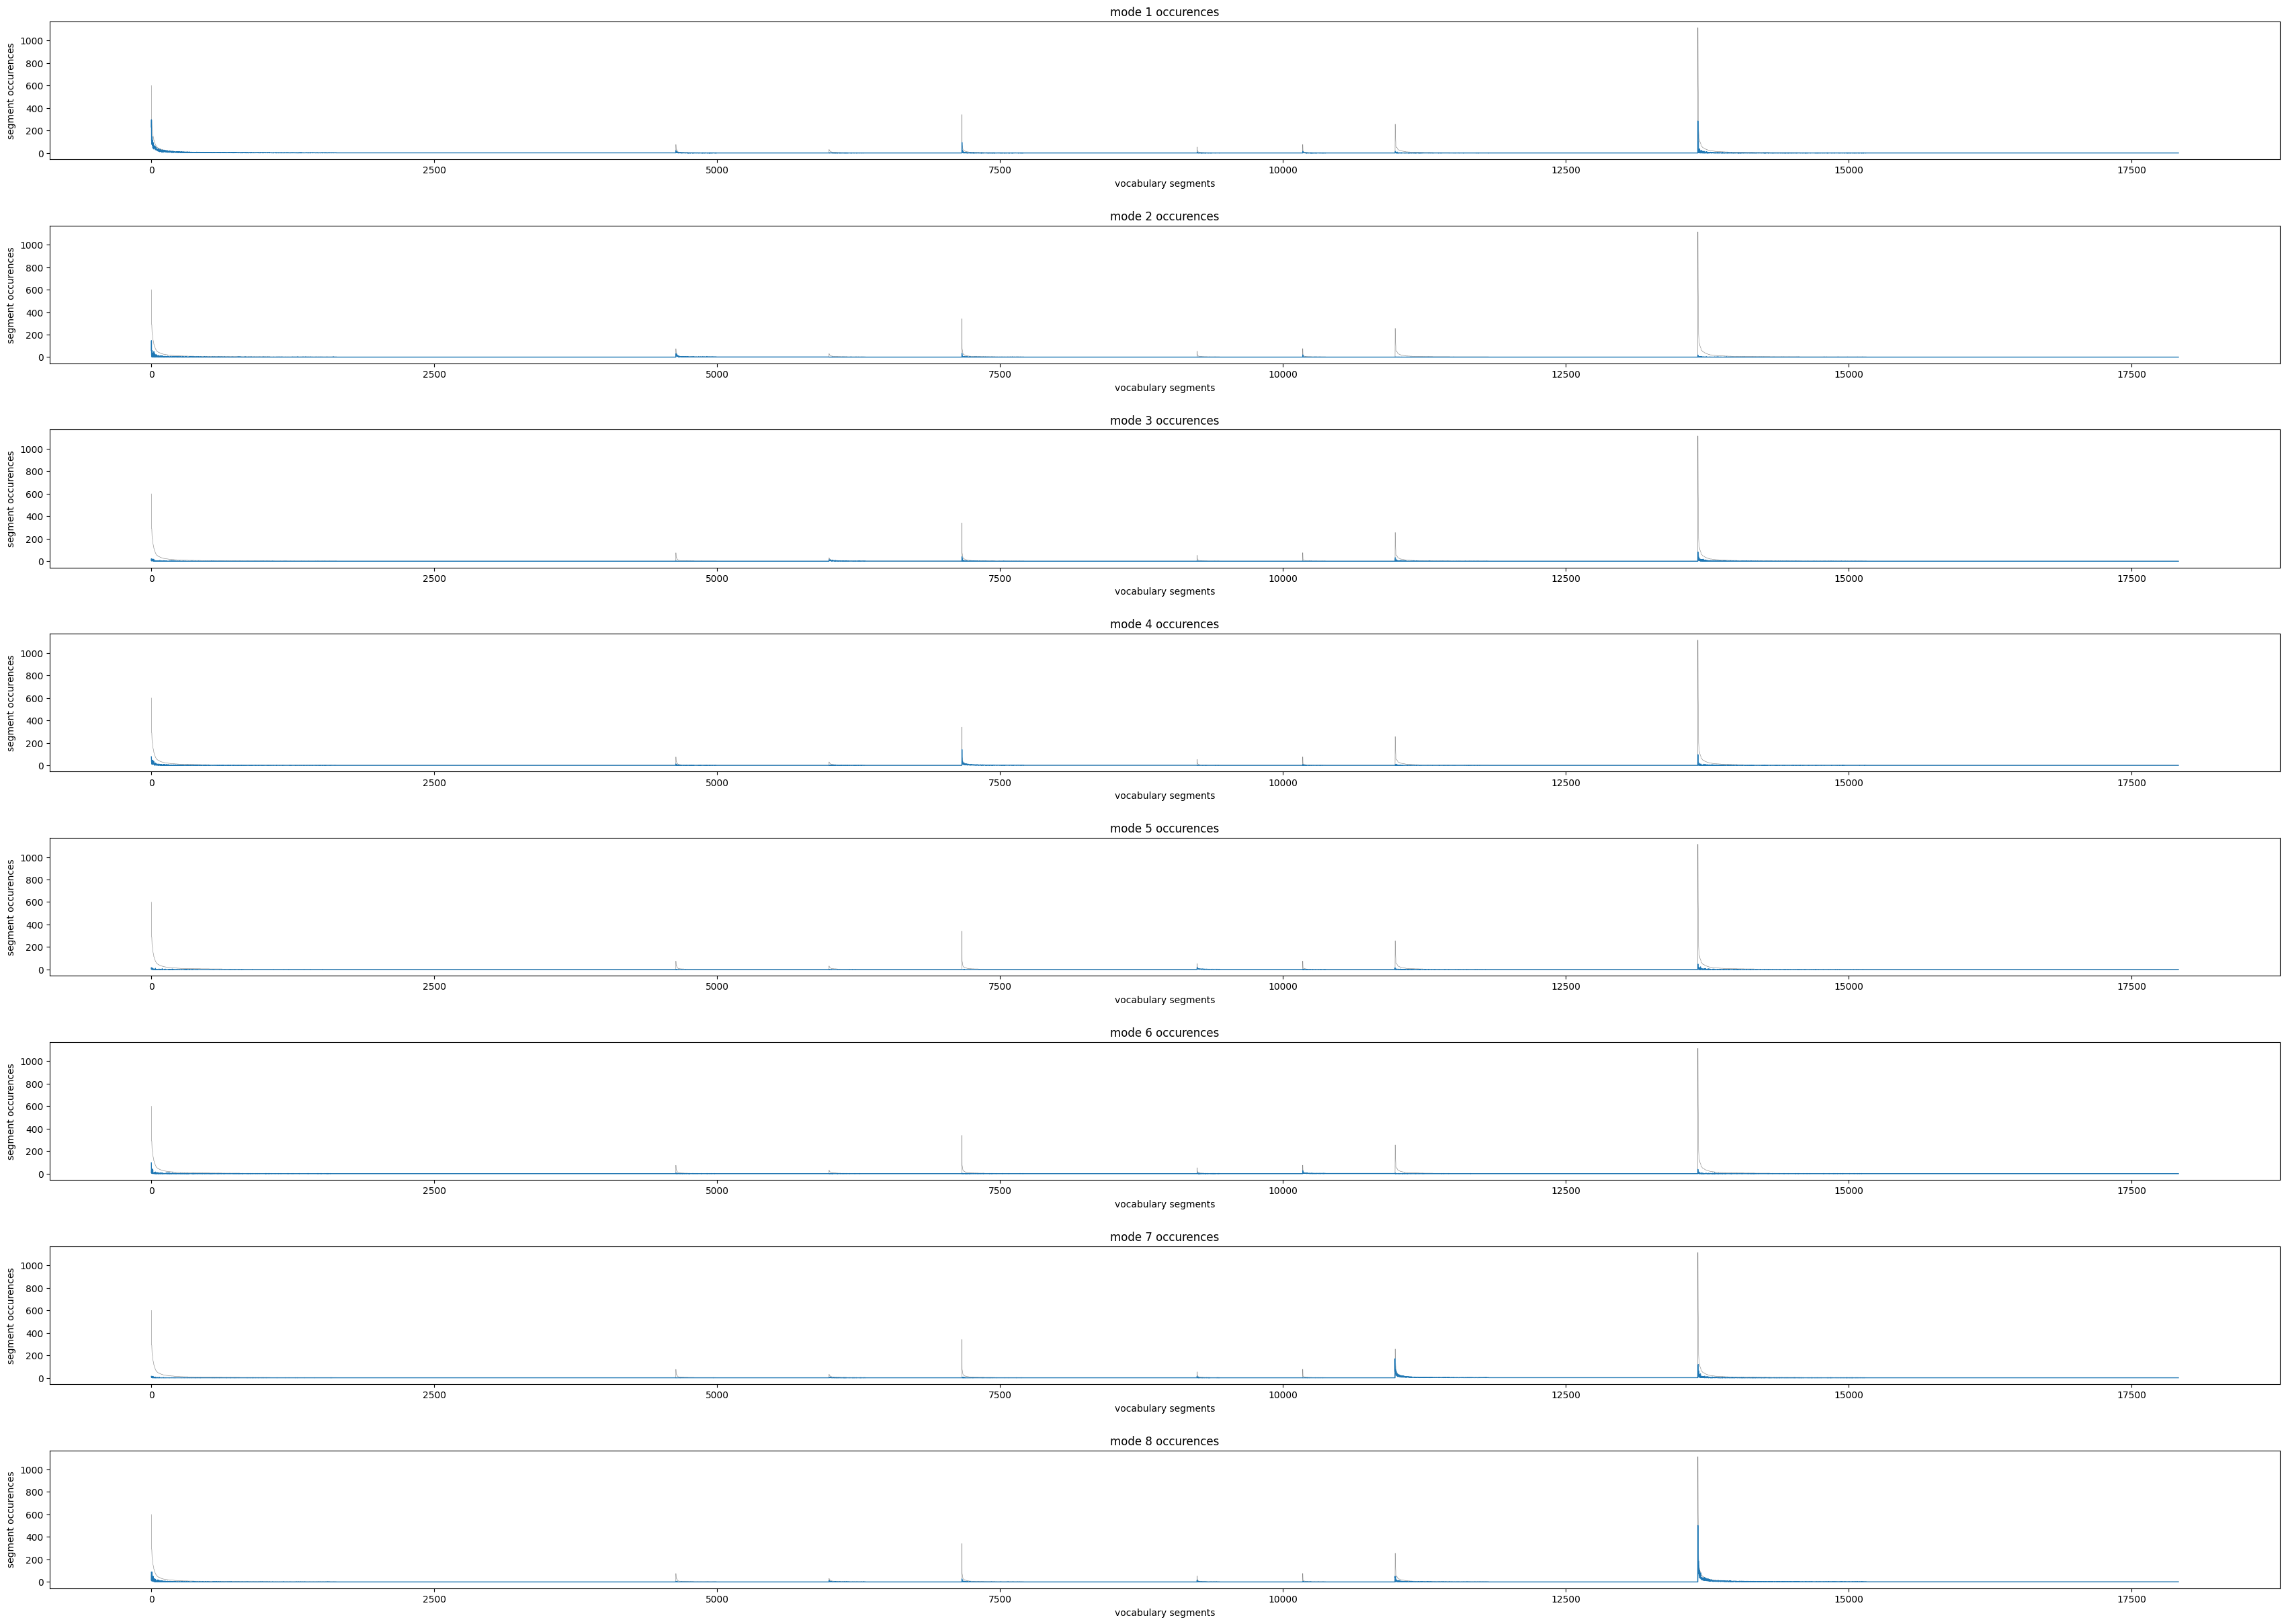

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------




Top selected melodies - from model: ['g', 'h', 'f', 'hg', 'd', 'k', 'gg', 'gh', 'e', 'gf', 'ghg', 'hgf', 'l', 'hh', 'dd', 'kk', 'fed', 'j', 'fe', 'fgh', 'khg', 'fghg', 'jh', 'ff', 'kj', 'hgg', 'ghgf', 'kjh', 'ggg', 'ed', 'gfe', 'hk', 'hhg', 'kh', 'ef', 'hgfg', 'efg', 'c', 'jkhg', 'lk', 'kkk', 'cd', 'gfgh', 'fgg', 'ggh', 'fgf', 'jk', 'gfed', 'df', 'ghk', 'hhh', 'll', 'jhg', 'klk', 'dc', 'kjk', 'kjkhg', 'fedd', 'edd', 'ggf', 'kkj', 'fghh', 'jkh', 'de', 'fff', 'gfghg', 'ee', 'gghg', 'ddd', 'hgfe', 'hhgf', 'hgfgh', 'cdd', 'hghg', 'ggk', 'gff', 'hkk', 'kjhg', 'ffe', 'ge', 'hhgg', 'dff', 'def', 'kkkk', 'ddc', 'fef', 'fghgf', 'fh', 'm', 'ghhg', 'defg', 'hkj', 'mlk', 'lml', 'efgf', 'lkj', 'lm', 'ffg', 'gkk', 'lmlk']


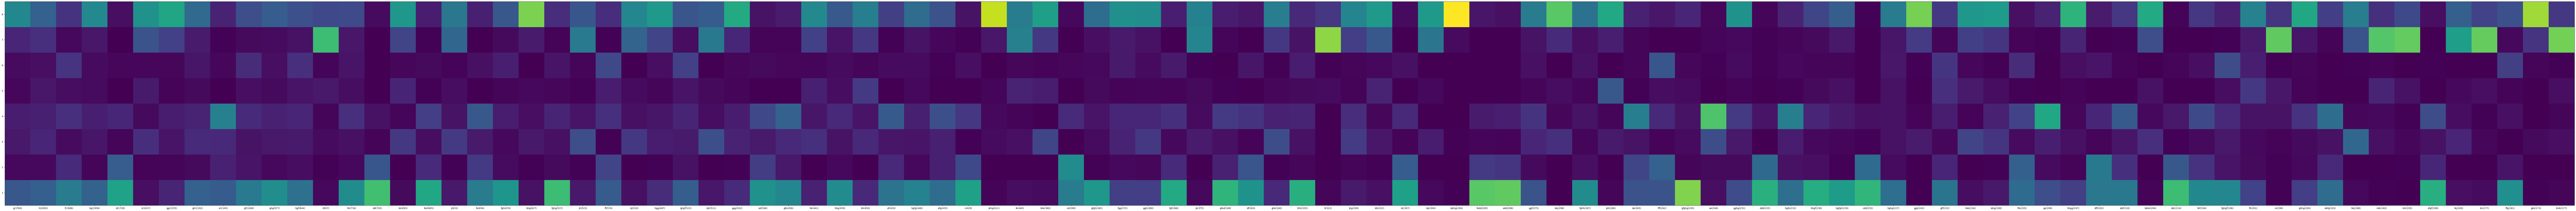

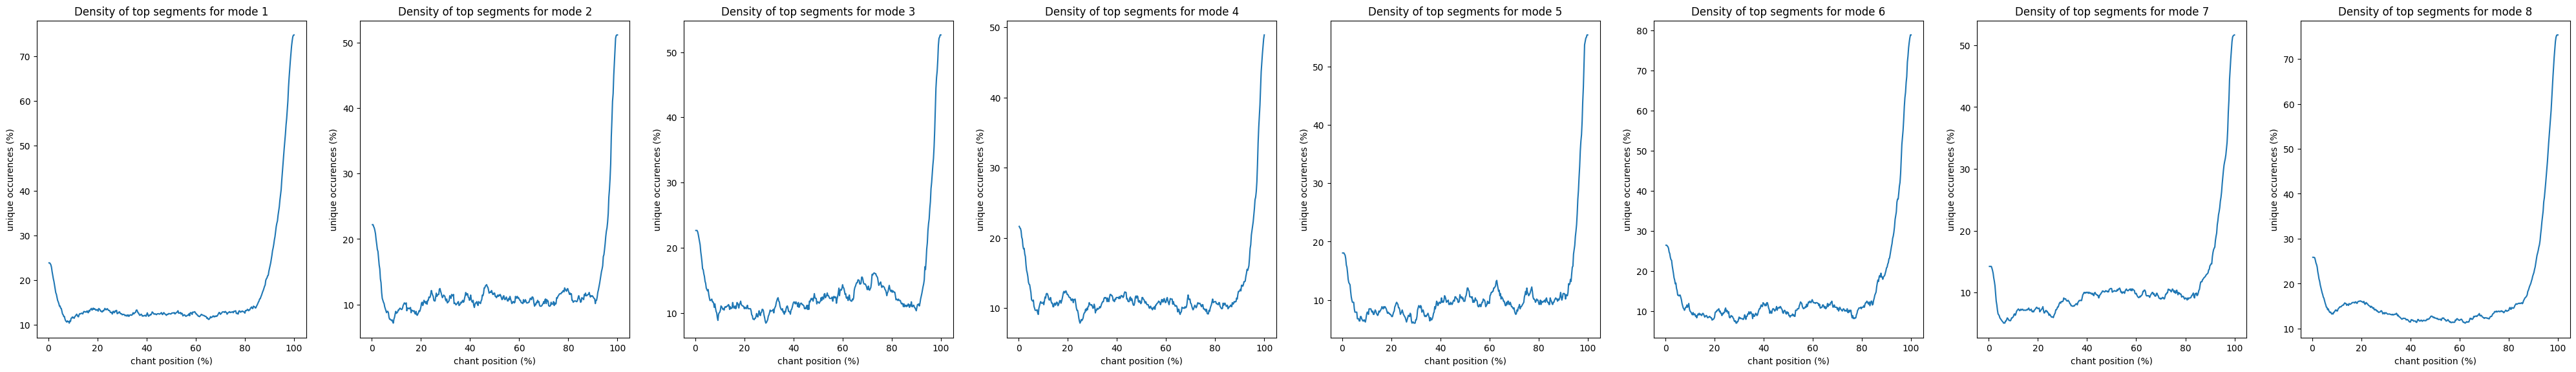





------------------------- Train + Test data charts ----------------------------
------------- Modes Vocabulary Statistics -------------


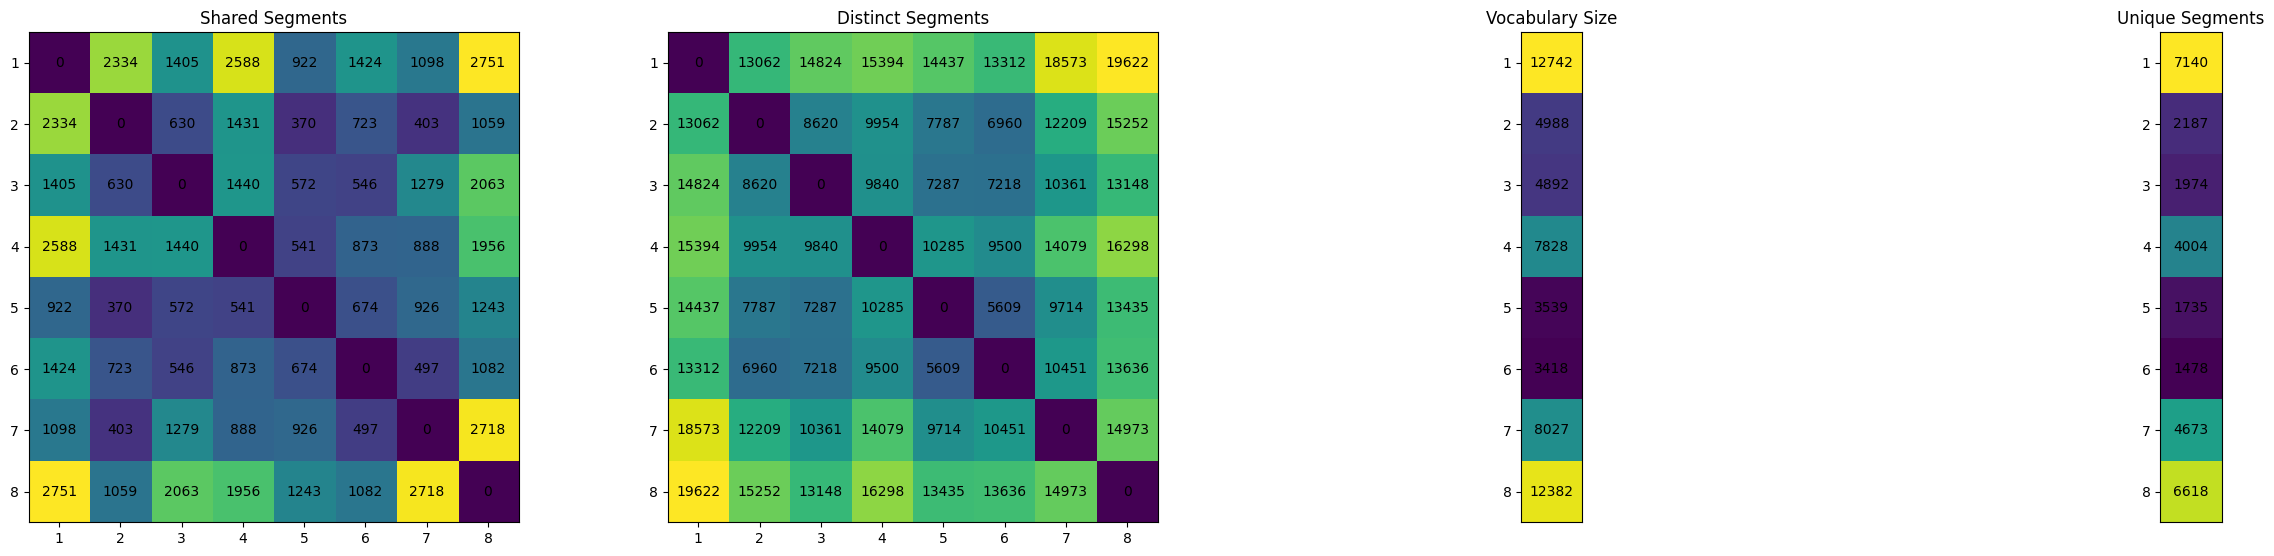

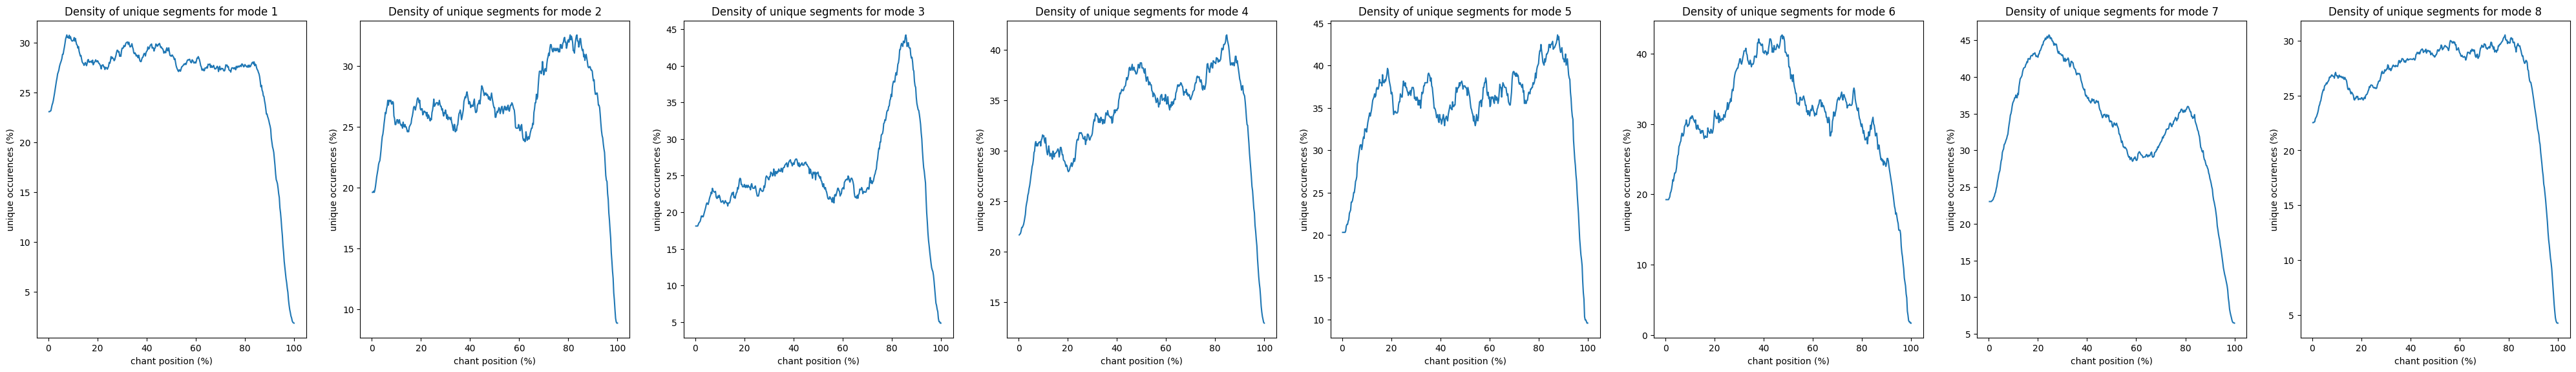

-------------------------------------------------------
------------------------------------------------------------------------


In [ ]:
from src.utils.loader import prepare_dataset
from src.eval.pipelines import evaluation_pipeline
from src.models.random_model import RandomModel

# Get Data
X, y = prepare_dataset()
X_train, y_train = X[:int(0.9*9706)].tolist(), y[:int(0.9*9706)].tolist()
X_dev, y_dev = X[int(0.9*9706):9706].tolist(), y[int(0.9*9706):9706].tolist()
X_test, y_test = X[9706:].tolist(), y[9706:].tolist()
# Init model
model = RandomModel(1, 7)
# Predictions
mjwp_score = model.get_mjwp_score()
X_train = X_train+X_dev
y_train = y_train+y_dev
train_segmentation, train_perplexity = model.predict_segments(X_train)
test_segmentation, test_perplexity = model.predict_segments(X_test)

# Evaluate model
bacor_model = evaluation_pipeline(
    train_segmentation, y_train, test_segmentation, y_test, -1, -1, mjwp_score,
    max_features_from_model = 100, include_additative = False, fe_occurence_coef=10)